# Feature Selection and Bootstrapping

## Feature Selection (6.6.11)

### PART 1 - MODEL ESTIMATION

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Data set-up

In [5]:
from sklearn.model_selection import train_test_split

boston_other, boston_test = train_test_split(
  boston, 
  train_size = 0.75,
  random_state = 425, 
  )
boston_test.shape

(127, 13)

In [6]:
boston_other.shape

(379, 13)

In [7]:
X_other = boston_other.drop('crim', axis = 1)
y_other = boston_other.crim

X_test = boston_test.drop('crim', axis = 1)
y_test = boston_test.crim

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scalar = StandardScaler()

### Models

**OLS**

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
ols = LinearRegression()
ols

LinearRegression()

In [103]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('std_tf', StandardScaler()), 
                 ('model', ols)])

In [55]:
param_grid = {'model__fit_intercept': [True, False],
              'model__normalize': [True, False]}

In [102]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=10, 
    scoring = "neg_root_mean_squared_error",
    refit = True 
    ) 

In [57]:
grid_search.fit(X_other, y_other)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_tf', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'model__normalize': [True, False]},
             scoring='neg_root_mean_squared_error')

In [62]:
cv_rmse = -grid_search.best_score_
cv_rmse

6.82549739605561

In [101]:
from sklearn.metrics import mean_squared_error

test_rmse = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared = False)
test_rmse

3.0350619008717334

**LASSO**

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 10000)
lasso

Lasso(max_iter=10000)

In [64]:
pipe_l1 = Pipeline(steps = [
  ("std_tf", scalar), 
  ("model", lasso)])
pipe_l1

Pipeline(steps=[('std_tf', StandardScaler()), ('model', Lasso(max_iter=10000))])

In [65]:
alphas_l1 = np.logspace(start = -5, stop = 5, base = 10, num = 100)
tuned_parameters_l1 = {"model__alpha": alphas_l1}

In [66]:
n_folds_l1 = 10
search_l1 = GridSearchCV(
  pipe_l1, 
  tuned_parameters_l1, 
  cv = n_folds_l1, 
  scoring = "neg_root_mean_squared_error",
  refit = True 
  )

In [67]:
search_l1.fit(X_other, y_other)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_tf', StandardScaler()),
                                       ('model', Lasso(max_iter=10000))]),
             param_grid={'model__alpha': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04...
       4.75081016e+02, 5.99484250e+02, 7.56463328e+02, 9.54548457e+02,
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05])},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

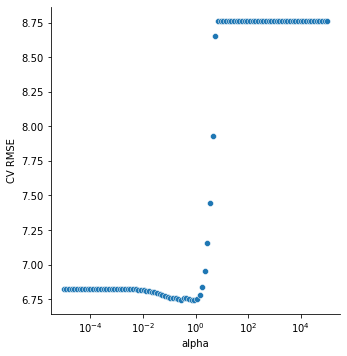

In [68]:
cv_res_l1 = pd.DataFrame({
  "alpha": alphas_l1,
  "rmse": -search_l1.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  data = cv_res_l1,
  x = "alpha",
  y = "rmse"
  ).set(
    xlabel = "alpha",
    ylabel = "CV RMSE",
    xscale = "log"
);
plt.show()

In [82]:
cv_rmse_l1 = -search_l1.best_score_
cv_rmse_l1

6.743243955005909

In [83]:
search_l1.best_estimator_

Pipeline(steps=[('std_tf', StandardScaler()),
                ('model', Lasso(alpha=0.8902150854450392, max_iter=10000))])

In [93]:
test_rmse_l1 = mean_squared_error(y_test, search_l1.best_estimator_.predict(X_test), squared = False)
test_rmse_l1

2.5935309152108177

**RIDGE**

In [71]:
from sklearn.linear_model import Ridge

ridge = Ridge(max_iter = 10000)
ridge

Ridge(max_iter=10000)

In [72]:
pipe_l2 = Pipeline(steps = [
  ("std_tf", scalar), 
  ("model", ridge)])
pipe_l2

Pipeline(steps=[('std_tf', StandardScaler()), ('model', Ridge(max_iter=10000))])

In [73]:
alphas_l2 = np.logspace(start = -5, stop = 5, base = 10, num = 100)
tuned_parameters_l2 = {"model__alpha": alphas_l2}

In [74]:
n_folds_l2 = 10
search_l2 = GridSearchCV(
  pipe_l2, 
  tuned_parameters_l2, 
  cv = n_folds_l2, 
  scoring = "neg_root_mean_squared_error",
  refit = True 
  )

In [75]:
search_l2.fit(X_other, y_other)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_tf', StandardScaler()),
                                       ('model', Ridge(max_iter=10000))]),
             param_grid={'model__alpha': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04...
       4.75081016e+02, 5.99484250e+02, 7.56463328e+02, 9.54548457e+02,
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05])},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

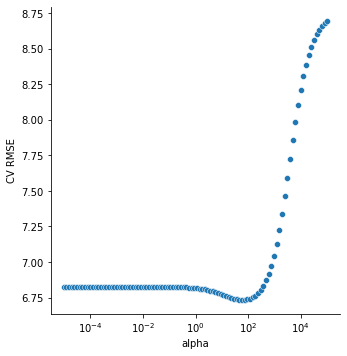

In [76]:
cv_res_l2 = pd.DataFrame({
  "alpha": alphas_l2,
  "rmse": -search_l2.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  data = cv_res_l2,
  x = "alpha",
  y = "rmse"
  ).set(
    xlabel = "alpha",
    ylabel = "CV RMSE",
    xscale = "log"
);
plt.show()

In [89]:
cv_rmse_l2 = -search_l2.best_score_
cv_rmse_l2

6.73272869881755

In [90]:
search_l2.best_estimator_

Pipeline(steps=[('std_tf', StandardScaler()),
                ('model', Ridge(alpha=58.57020818056661, max_iter=10000))])

In [91]:
test_rmse_l2 = mean_squared_error(y_test, search_l2.best_estimator_.predict(X_test), squared = False)
test_rmse_l2

2.7679272571036835

### Results

In [95]:
d = {'Model': ["OLS", "Lasso", "Ridge"], 'CV RMSE': [cv_rmse, cv_rmse_l1, cv_rmse_l2], 
     'Test RMSE': [test_rmse, test_rmse_l1, test_rmse_l2]}
outcome = pd.DataFrame(data=d)
print(outcome)

   Model   CV RMSE  Test RMSE
0    OLS  6.825497   3.035062
1  Lasso  6.743244   2.593531
2  Ridge  6.732729   2.767927


### PART 2 - MODEL SELECTION

It is better to prioritize the test RMSE as it provides a better indicator of how well the model will perform on unseen data. Cross-validation RMSE can give an optimistic estimate of a model's performance due to overfitting to the training data. Therefore, the selected model is **Lasso**.

### PART 3 - COEFFCIENTS

In [105]:
print(search_l1.best_estimator_.named_steps.model.coef_)

[-0.          0.         -0.          0.         -0.          0.
 -0.          4.25732552  0.          0.          0.86334246 -0.50060158]


In [109]:
features = boston.drop('crim', axis = 1).columns 
coef = search_l1.best_estimator_.named_steps['model'].coef_
coef_df = pd.DataFrame({'features': features, 'coef': coef})
coef_df = coef_df[coef_df['coef'] != 0]
print(coef_df)

   features      coef
7       rad  4.257326
10    lstat  0.863342
11     medv -0.500602


Lasso shrinks the coefficients towards 0 to reduce overfitting and improve the interpretability of the model. By doing this it also performs feature selection, effectively removing irrelevant variables from the model.

## Bootstrapping (5.4.2)

**(a)** <br>
$n$ = number of observations <br>
There is an equal probablility to extract any observation during the bootstrapping, hence: <br>
$1/n$ = probability to select as first the $j_{th}$ observation <br>
So: <br>
$1-(1/n)$ = probabilty that the $j_{th}$ observation of the sample is not the first bootstrap observation

**(b)** <br>
Bootstrap is sampling with replacement, so the probability is $1-(1/n)$

**(c)** <br>
The probability of not being selected for an observation is, again, $1-(1/n)$ = $P(s_{i} \not= j)$. So: <br>
$P(s_{1} \not= j) \cap\ P(s_{2} \not= j) \cap\ ... \cap\ P(s_{n} \not= j)$ <br>
$= \prod_{i = 1}^{n} P(s_{n} \not= j)$ <br>
$= \prod_{i = 1}^{n} 1-(1/n)$ <br>
$= (1-(1/n))^n$ is the probability that the $j_{th}$ observation is not in the bootstrap sample

In [30]:
def boot(n):
    p = 1 - (1-(1/n))**n
    return p

In [31]:
#(d)
boot(5)

0.6723199999999999

In [32]:
#(e)
boot(100)

0.6339676587267709

In [33]:
#(f)
boot(10000)

0.6321389535670295

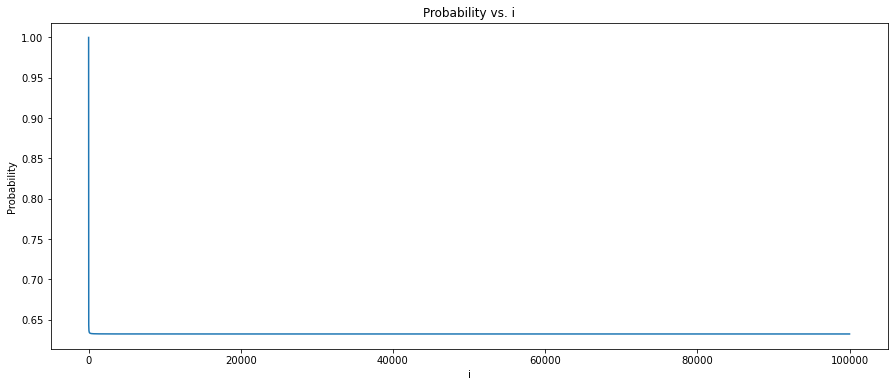

In [9]:
#(g)
n = 100000
values = range (1, n+1)

probabilities = []
for i in values:
    p = 1 - (1-(1/i))**i
    probabilities.append(p)

plt.figure(figsize = (15, 6))
plt.plot(values, probabilities)
plt.xlabel("i")
plt.ylabel("Probability")
plt.title("Probability vs. i")
plt.show()

The probability suddenly fall and then approximates towards a probability level just below 0.65.

In [14]:
#(h)
store = [None] * 10000

for i in range(1, 10001):
    store[i-1] = 4 in np.random.choice(100, 100, replace=True)

print("According to the simulation, the probability that a bootstrap sample of size n = 100 contains the 4th observation is", 
      np.mean(store))

According to the simulation, the probability that a bootstrap sample of size n = 100 contains the 4th observation is 0.6395


As it has been observed above, the probability converges to a level just below 0.65. 

## Bootstrapping in Practice (5.4.9)

In [16]:
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### Mean

In [51]:
mean = boston.medv.mean()
mean

22.532806324110698

### SE for the mean

In [40]:
se_m = np.std(boston.medv, ddof=1) / np.sqrt(np.size(boston.medv))
se_m

0.4088611474975351

### Bootstrapped SE for the mean

In [71]:
def bootstrap_se_of_mean(data, num_samples=1000, sample_size=None):
    if sample_size is None:
        sample_size = len(data)
    samples = np.random.choice(data, (num_samples, sample_size), replace=True)
    sample_means = np.mean(samples, axis=1)
    se_bm = np.std(sample_means)
    lower, upper = np.percentile(sample_means, [2.5, 97.5])
    return se_bm, lower, upper

se_bm, lower, upper = bootstrap_se_of_mean(boston.medv)
print(se_bm)

0.39395969250997764


In [72]:
print("The SE of the mean is:", se_m,"\nThe bootstrapped SE of the mean is:", se_bm)

The SE of the mean is: 0.4088611474975351 
The bootstrapped SE of the mean is: 0.39395969250997764


### CI for the bootstrapped SE

In [73]:
std = boston.medv.std()
n = len(boston.medv)
df = n - 1
t_critical = stats.t.ppf(0.975, df)
margin_error = t_critical * std / np.sqrt(n)

lower2 = mean - margin_error
upper2 = mean + margin_error

In [85]:
print("The CI for the bootstrap SE of the mean is: [{}, {}]".format(lower, upper))
print("The CI for the SE of the mean is: [{}, {}]".format(lower2, upper2))

The CI for the bootstrap SE of the mean is: [21.772193675889326, 23.34530138339921]
The CI for the SE of the mean is: [21.729528014578616, 23.33608463364278]


### Median 

In [66]:
med = boston.medv.median()
med

21.2

### Bootstrapped median

In [82]:
def bootstrap_se_of_med(data, num_samples=1000, sample_size=None):
    if sample_size is None:
        sample_size = len(data)
    samples = np.random.choice(data, (num_samples, sample_size), replace=True)
    sample_med = np.median(samples, axis=1)
    se_bmed = np.std(sample_med)
    return se_bmed

se_bmed = bootstrap_se_of_med(boston.medv)
print(se_bmed)

0.37226469077794605


### 10% percentile

In [95]:
q10 = np.quantile(boston.medv, 0.1)
q10

12.75

### Bootstrapped 10% percentile

In [103]:
def bootstrap_se_of_q(data, num_samples=1000, sample_size=None):
    if sample_size is None:
        sample_size = len(data)
    samples = np.random.choice(data, (num_samples, sample_size), replace=True)
    q10 = np.quantile(samples, 0.1, axis=1)
    se_q = np.std(q10)
    return se_q

se_q = bootstrap_se_of_q(boston.medv)
print(se_q)

0.4951747570302832


The standard error is obtained by bootstrapping and the value is small compared to the tenth percentile which means the results is pretty accurate.